In [8]:
#import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# reading csv file using pandas 

df=pd.read_csv("titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df=pd.read_csv("titanic_dataset.csv",index_col="PassengerId",usecols=['PassengerId','Pclass','Survived'])
df

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


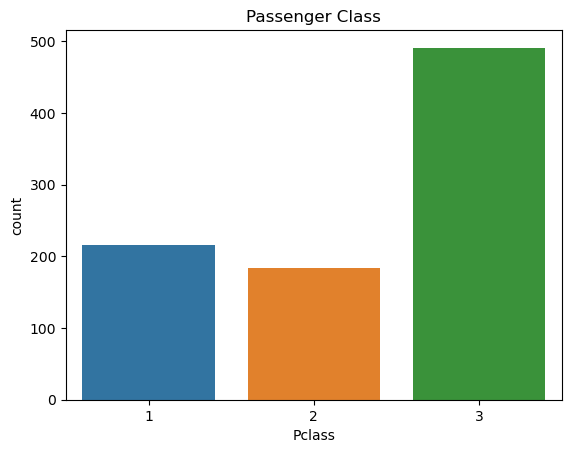

In [24]:
sns.countplot(x=df.Pclass, data=df)
plt.title("Passenger Class")

plt.show()

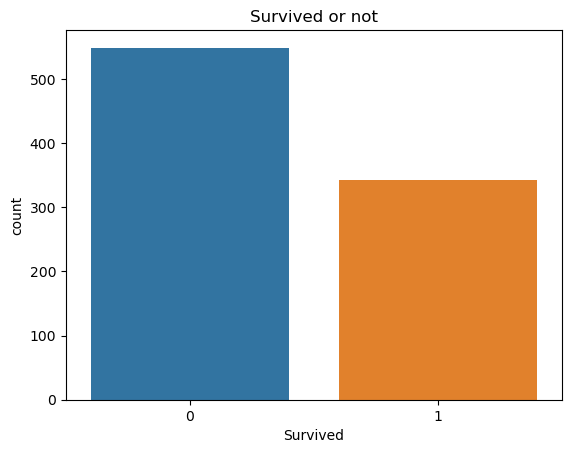

In [27]:
sns.countplot(x=df.Survived,data=df)
plt.title("Survived or not")

plt.show()

In [30]:
PClass_survd = pd.pivot_table(df,index=['Pclass'],columns=['Survived'],aggfunc='size')
PClass_survd

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


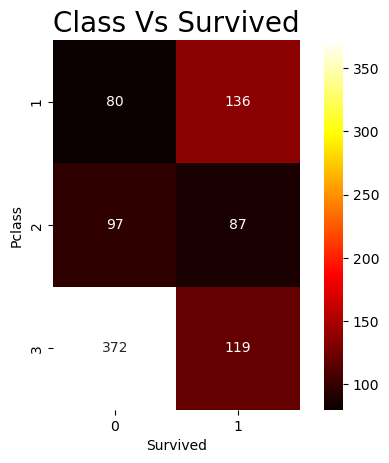

In [34]:
sns.heatmap(PClass_survd,annot=True,fmt="g",square=True,cmap='hot')
plt.title('Class Vs Survived',fontsize=20)
plt.show()

In [36]:
pct_class = PClass_survd.sum(axis=1)/891
pct_class

Pclass
1    0.242424
2    0.206510
3    0.551066
dtype: float64

In [37]:
pct_survived = PClass_survd.sum(axis=0)/891
pct_survived

Survived
0    0.616162
1    0.383838
dtype: float64

In [38]:
pct_class.to_frame()@(pct_survived.to_frame().T) 
# These are the proportion of people expected with null hypothesis

Survived,0,1
Pclass,,
1,0.149373,0.093052
2,0.127243,0.079266
3,0.339546,0.211520


In [39]:
exp = round(pct_class.to_frame()@(pct_survived.to_frame().T)*891)
exp
# This is the number of people in all classes and survival history expected.

Survived,0,1
Pclass,,
1,133.0,83.0
2,113.0,71.0
3,303.0,188.0


In [40]:
plt.figure(figsize=(10,4))

plt.subplot('121')
sns.heatmap(PClass_survd,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Observed',fontsize=20)

plt.subplot('122')
sns.heatmap(exp,annot=True, fmt='g',square=True,cmap='hot')
plt.title('Expected',fontsize=20)
plt.tight_layout()


plt.show()

ValueError: Single argument to subplot must be a three-digit integer, not '121'

<Figure size 1000x400 with 0 Axes>